In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_CMBS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1998-01-31 00:00:00,0.131980,#VALUE!,#VALUE!,0.405000,0.660023,0.671127,0.708245,0.624016,0.706001,0.000000,0.561522,0.173089,0.617685,0.318823,0.420055,0.242360,0.498648,1
1,1998-02-28 00:00:00,0.076142,#VALUE!,#VALUE!,0.779222,0.633513,0.691848,0.573015,0.616500,0.623432,0.000000,0.394141,0.231658,0.586884,0.243321,0.350215,0.261704,0.463807,1
2,1998-03-31 00:00:00,0.055838,#VALUE!,#VALUE!,0.576556,0.528896,0.602060,0.584834,0.246242,0.601879,0.033368,0.466896,0.175247,0.416437,0.193492,0.331136,0.197741,0.461774,1
3,1998-04-30 00:00:00,0.055838,#VALUE!,#VALUE!,0.442333,0.439477,0.484645,0.552395,0.000000,0.459356,0.020775,0.486104,0.228268,0.480389,0.081423,0.331909,0.134753,0.442481,3
4,1998-05-31 00:00:00,0.010152,#VALUE!,#VALUE!,0.617444,0.652790,0.453564,0.575822,0.000000,0.307336,0.069822,0.521219,0.112978,0.418787,0.085781,0.332143,0.201886,0.450922,3


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,267.000000,266.000000,266.000000,263.000000,263.000000,260.000000,260.000000,257.000000,257.000000,245.000000,245.000000,233.000000,233.000000,267.000000
mean,0.389551,0.508826,0.507331,0.502922,0.510516,0.503568,0.489132,0.511401,0.510328,0.513404,0.476935,0.502615,0.482371,2.528090
std,0.327368,0.260708,0.243181,0.274559,0.258519,0.283993,0.249247,0.276018,0.263561,0.296969,0.226476,0.312065,0.234052,1.062943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.129442,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.299492,0.510422,0.462486,0.493021,0.474618,0.501222,0.465767,0.519729,0.475128,0.491521,0.445444,0.483095,0.450922,3.000000
75%,0.472081,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              233 non-null    object 
 1   OAS                               190 non-null    float64
 2   Excess Return % 3-mo (Treasury)   233 non-null    float64
 3   Excess Return % 3-mo (Agg)        233 non-null    float64
 4   Excess Return % 6-mo (Treasury)   233 non-null    float64
 5   Excess Return % 6-mo (Agg)        233 non-null    float64
 6   Excess Return % 9-mo (Treasury)   233 non-null    float64
 7   Excess Return % 9-mo (Agg)        233 non-null    float64
 8   Excess Return % 12-mo (Treasury)  233 non-null    float64
 9   Excess Return % 12-mo (Agg)       233 non-null    float64
 10  Excess Return % 24-mo (Treasury)  233 non-null    float64
 11  Excess Return % 24-mo (Agg)       233 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.3946700505


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.570643,0.518220,0.490181,0.535728,0.499572,0.560188,0.463148,0.601652,0.518602,0.632923,0.489539,0.609353,0.515223,2.583333
std,0.193180,0.293240,0.248024,0.299239,0.275905,0.291191,0.254799,0.234288,0.252741,0.232319,0.166462,0.179490,0.116676,0.963887
min,0.395939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255527,0.352019,1.000000
25%,0.416244,0.371855,0.338291,0.383590,0.376446,0.444843,0.368444,0.533061,0.379299,0.528609,0.410391,0.501565,0.436595,2.000000
50%,0.472081,0.561852,0.515367,0.612563,0.506590,0.601222,0.480934,0.617910,0.508428,0.601364,0.476820,0.560509,0.493400,3.000000
75%,0.747462,0.673039,0.657221,0.692108,0.670601,0.737220,0.666590,0.702875,0.729958,0.822802,0.624117,0.745022,0.580415,3.000000
max,0.979695,1.000000,1.000000,1.000000,1.000000,1.000000,0.874945,1.000000,0.973051,1.000000,0.757619,1.000000,0.767555,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 3-mo (Treasury)  48.0  0.518220  0.293240  0.042326   
 2                         combined  96.0  0.544432  0.248394  0.025352   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.433072  0.603368  
 2   0.494102  0.594761  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.0524
 1                              Degrees of freedom =   94.0000
 2                                               t =    1.0343
 3                           Two side test p value =    0.3037
 4                          Difference < 0 p value =    0.8482
 5                          Difference > 0 p value =    0.1518
 6                                       Cohen's d =    0.2111
 7                                       Hedge's g =    0.2094
 8                        

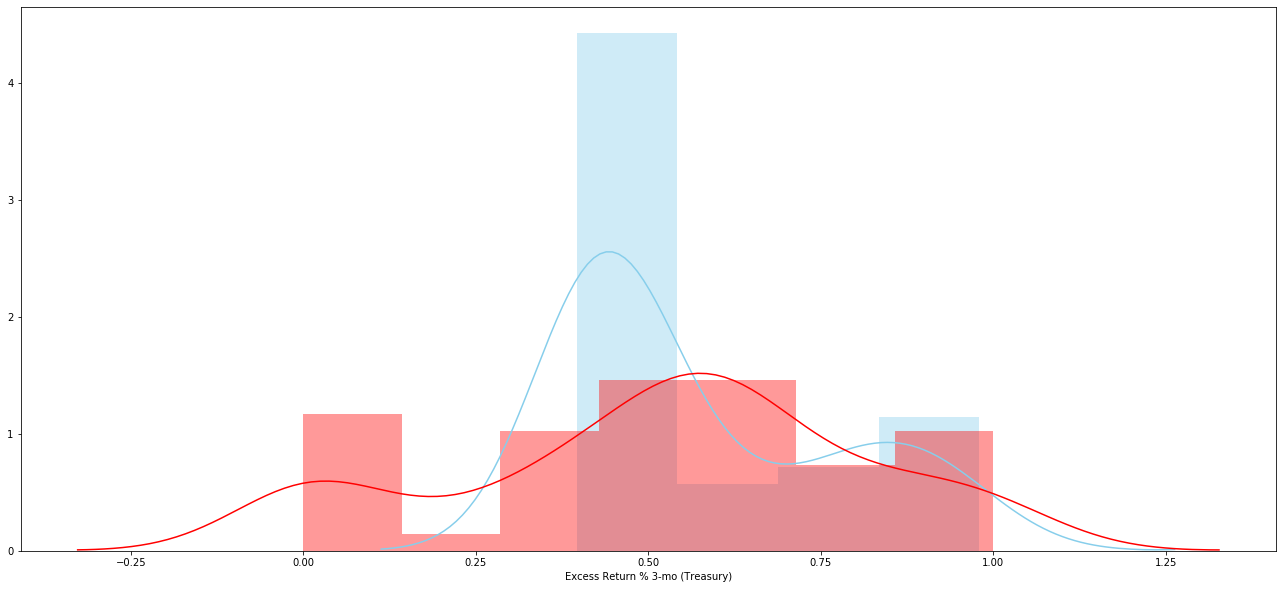

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  48.0  0.570643  0.193180  0.027883   0.514549   
 1  Excess Return % 3-mo (Agg)  48.0  0.490181  0.248024  0.035799   0.418163   
 2                    combined  96.0  0.530412  0.224794  0.022943   0.484865   
 
    Interval  
 0  0.626737  
 1  0.562200  
 2  0.575960  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.0805
 1                             Degrees of freedom =   94.0000
 2                                              t =    1.7732
 3                          Two side test p value =    0.0794
 4                         Difference < 0 p value =    0.9603
 5                         Difference > 0 p value =    0.0397
 6                                      Cohen's d =    0.3620
 7                                      Hedge's g =    0.3591
 8                                  Glass's delta =    

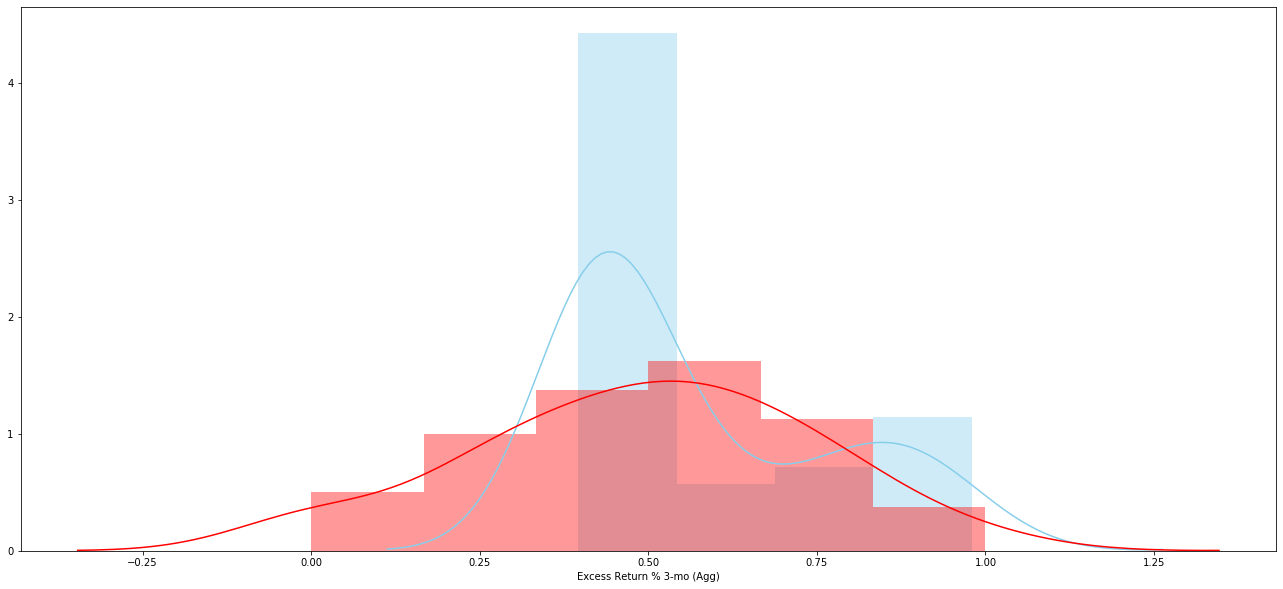

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 6-mo (Treasury)  48.0  0.535728  0.299239  0.043191   
 2                         combined  96.0  0.553185  0.251140  0.025632   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.448838  0.622617  
 2   0.502300  0.604071  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.0349
 1                              Degrees of freedom =   94.0000
 2                                               t =    0.6792
 3                           Two side test p value =    0.4987
 4                          Difference < 0 p value =    0.7506
 5                          Difference > 0 p value =    0.2494
 6                                       Cohen's d =    0.1386
 7                                       Hedge's g =    0.1375
 8                        

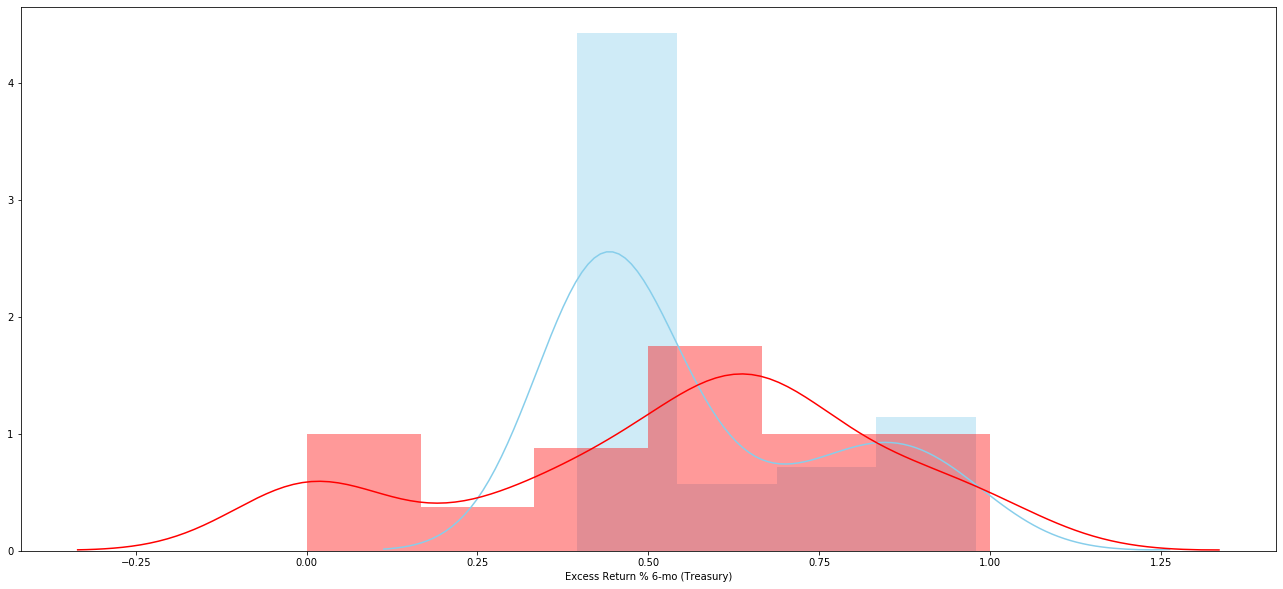

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  48.0  0.570643  0.193180  0.027883   0.514549   
 1  Excess Return % 6-mo (Agg)  48.0  0.499572  0.275905  0.039823   0.419457   
 2                    combined  96.0  0.535107  0.239583  0.024452   0.486563   
 
    Interval  
 0  0.626737  
 1  0.579686  
 2  0.583651  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.0711
 1                             Degrees of freedom =   94.0000
 2                                              t =    1.4619
 3                          Two side test p value =    0.1471
 4                         Difference < 0 p value =    0.9265
 5                         Difference > 0 p value =    0.0735
 6                                      Cohen's d =    0.2984
 7                                      Hedge's g =    0.2960
 8                                  Glass's delta =    

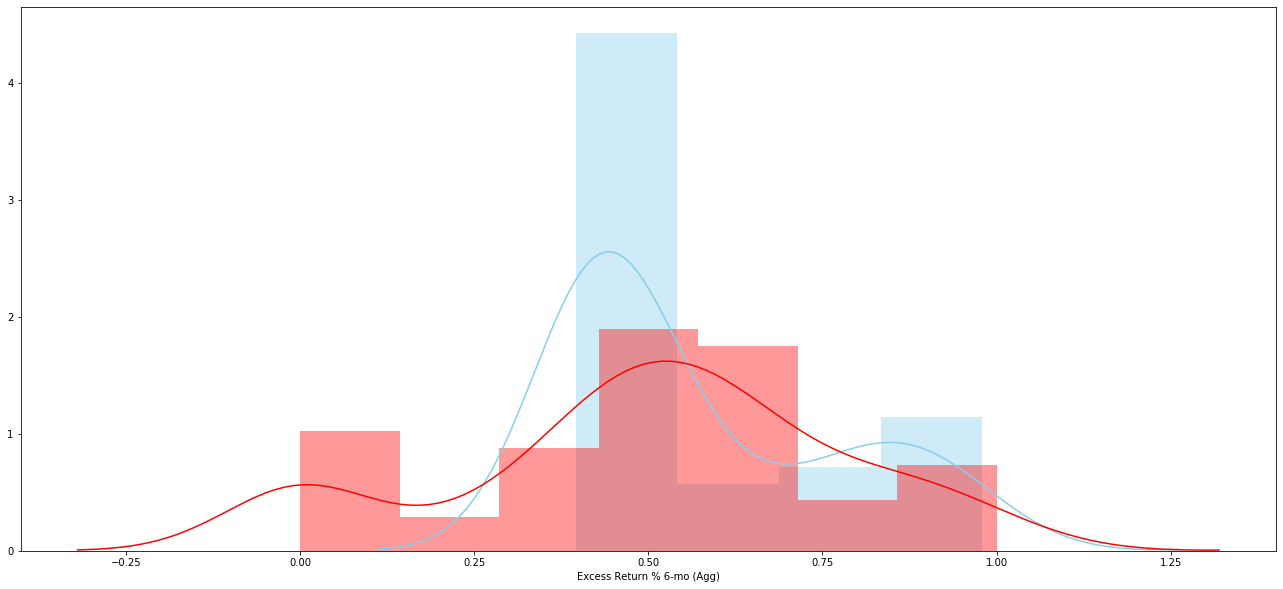

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 9-mo (Treasury)  48.0  0.560188  0.291191  0.042030   
 2                         combined  96.0  0.565415  0.245846  0.025092   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.475635  0.644741  
 2   0.515602  0.615229  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.0105
 1                              Degrees of freedom =   94.0000
 2                                               t =    0.2073
 3                           Two side test p value =    0.8362
 4                          Difference < 0 p value =    0.5819
 5                          Difference > 0 p value =    0.4181
 6                                       Cohen's d =    0.0423
 7                                       Hedge's g =    0.0420
 8                        

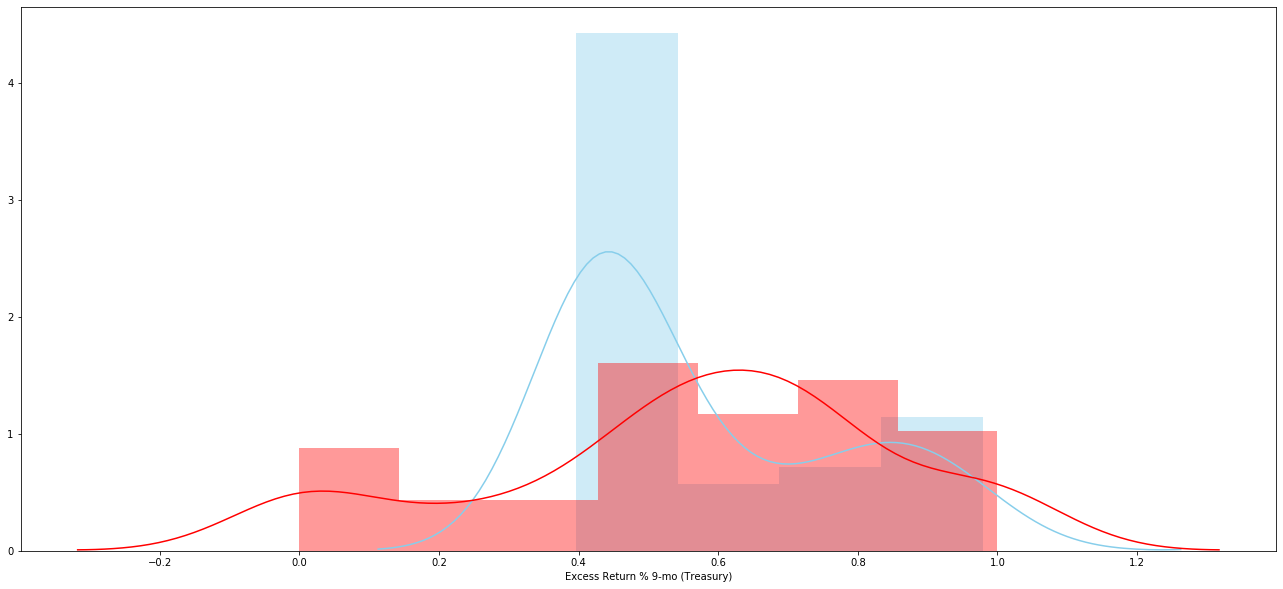

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  48.0  0.570643  0.193180  0.027883   0.514549   
 1  Excess Return % 9-mo (Agg)  48.0  0.463148  0.254799  0.036777   0.389162   
 2                    combined  96.0  0.516895  0.231304  0.023607   0.470029   
 
    Interval  
 0  0.626737  
 1  0.537134  
 2  0.563762  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.1075
 1                             Degrees of freedom =   94.0000
 2                                              t =    2.3292
 3                          Two side test p value =    0.0220
 4                         Difference < 0 p value =    0.9890
 5                         Difference > 0 p value =    0.0110
 6                                      Cohen's d =    0.4754
 7                                      Hedge's g =    0.4716
 8                                  Glass's delta =    

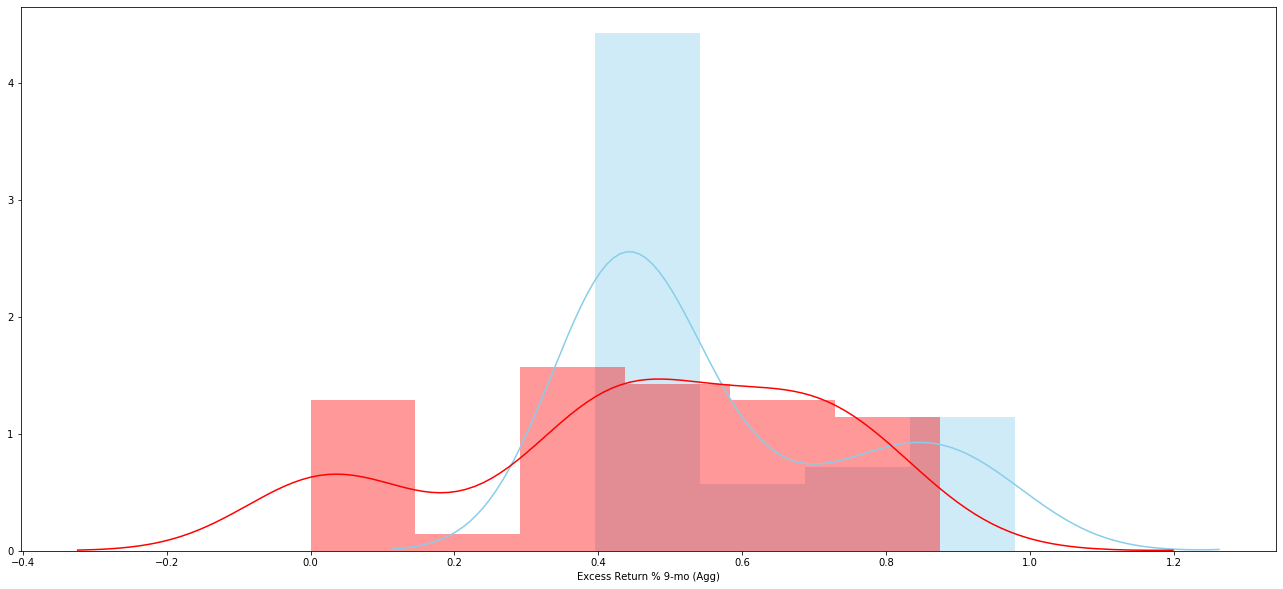

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 12-mo (Treasury)  48.0  0.601652  0.234288  0.033817   
 2                          combined  96.0  0.586148  0.214155  0.021857   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.533622  0.669683  
 2   0.542756  0.629539  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...  -0.0310
 1                              Degrees of freedom =   94.0000
 2                                               t =   -0.7075
 3                           Two side test p value =    0.4810
 4                          Difference < 0 p value =    0.2405
 5                          Difference > 0 p value =    0.7595
 6                                       Cohen's d =   -0.1444
 7                                       Hedge's g =   -0.1433
 8                    

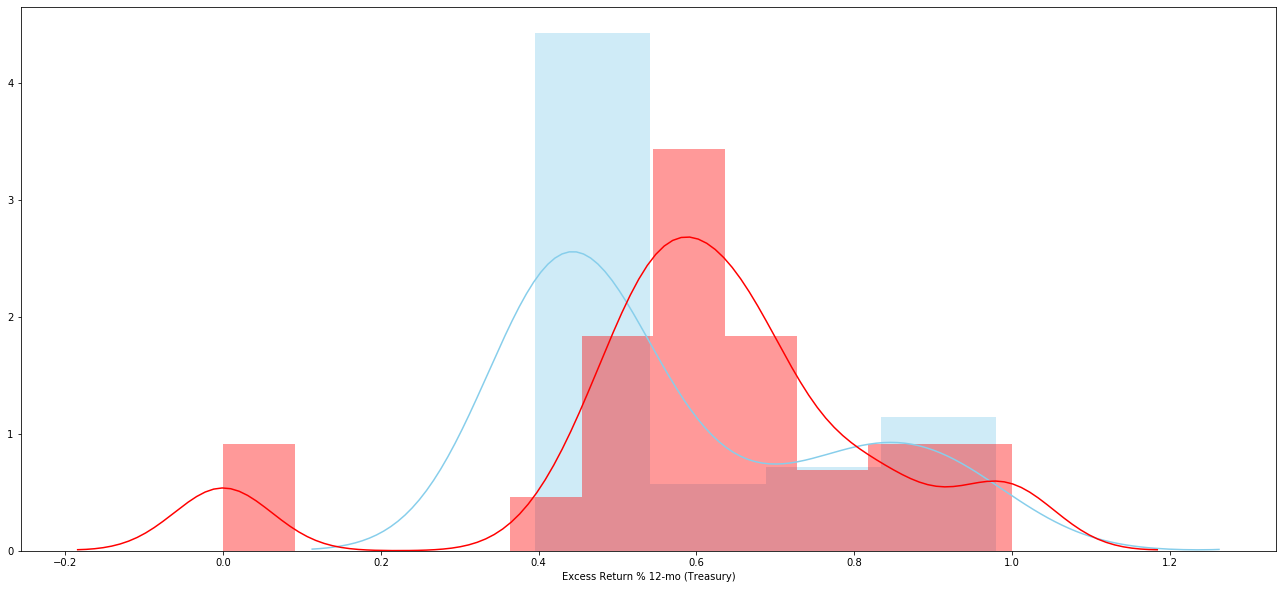

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  48.0  0.570643  0.193180  0.027883   0.514549   
 1  Excess Return % 12-mo (Agg)  48.0  0.518602  0.252741  0.036480   0.445214   
 2                     combined  96.0  0.544622  0.225277  0.022992   0.498977   
 
    Interval  
 0  0.626737  
 1  0.591990  
 2  0.590268  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.0520
 1                              Degrees of freedom =   94.0000
 2                                               t =    1.1334
 3                           Two side test p value =    0.2599
 4                          Difference < 0 p value =    0.8700
 5                          Difference > 0 p value =    0.1300
 6                                       Cohen's d =    0.2314
 7                                       Hedge's g =    0.2295
 8                                   Glass

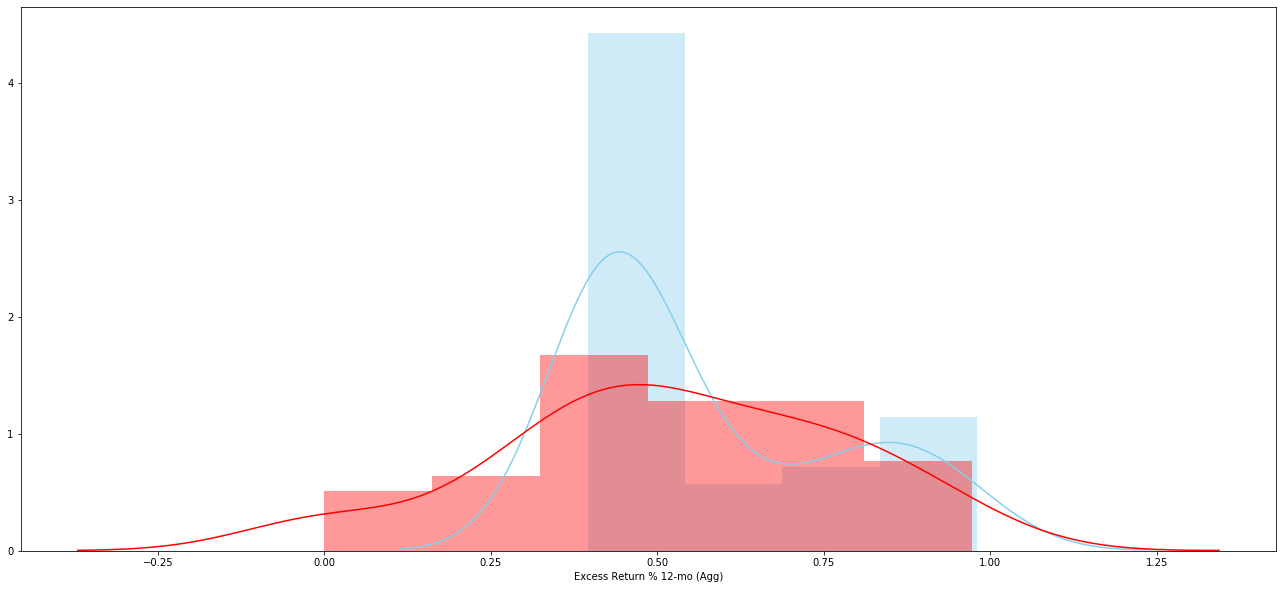

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 24-mo (Treasury)  48.0  0.632923  0.232319  0.033532   
 2                          combined  96.0  0.601783  0.214813  0.021924   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.565465  0.700381  
 2   0.558258  0.645308  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...  -0.0623
 1                              Degrees of freedom =   94.0000
 2                                               t =   -1.4281
 3                           Two side test p value =    0.1566
 4                          Difference < 0 p value =    0.0783
 5                          Difference > 0 p value =    0.9217
 6                                       Cohen's d =   -0.2915
 7                                       Hedge's g =   -0.2892
 8                    

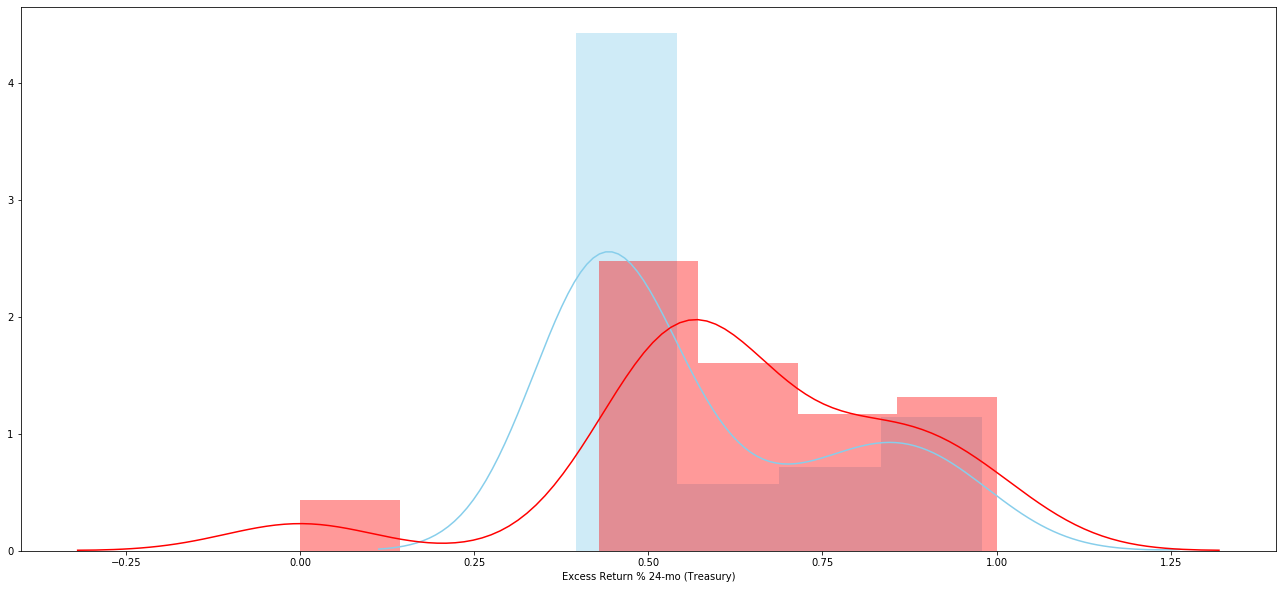

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  48.0  0.570643  0.193180  0.027883   0.514549   
 1  Excess Return % 24-mo (Agg)  48.0  0.489539  0.166462  0.024027   0.441203   
 2                     combined  96.0  0.530091  0.183939  0.018773   0.492821   
 
    Interval  
 0  0.626737  
 1  0.537874  
 2  0.567360  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.0811
 1                              Degrees of freedom =   94.0000
 2                                               t =    2.2035
 3                           Two side test p value =    0.0300
 4                          Difference < 0 p value =    0.9850
 5                          Difference > 0 p value =    0.0150
 6                                       Cohen's d =    0.4498
 7                                       Hedge's g =    0.4462
 8                                   Glass

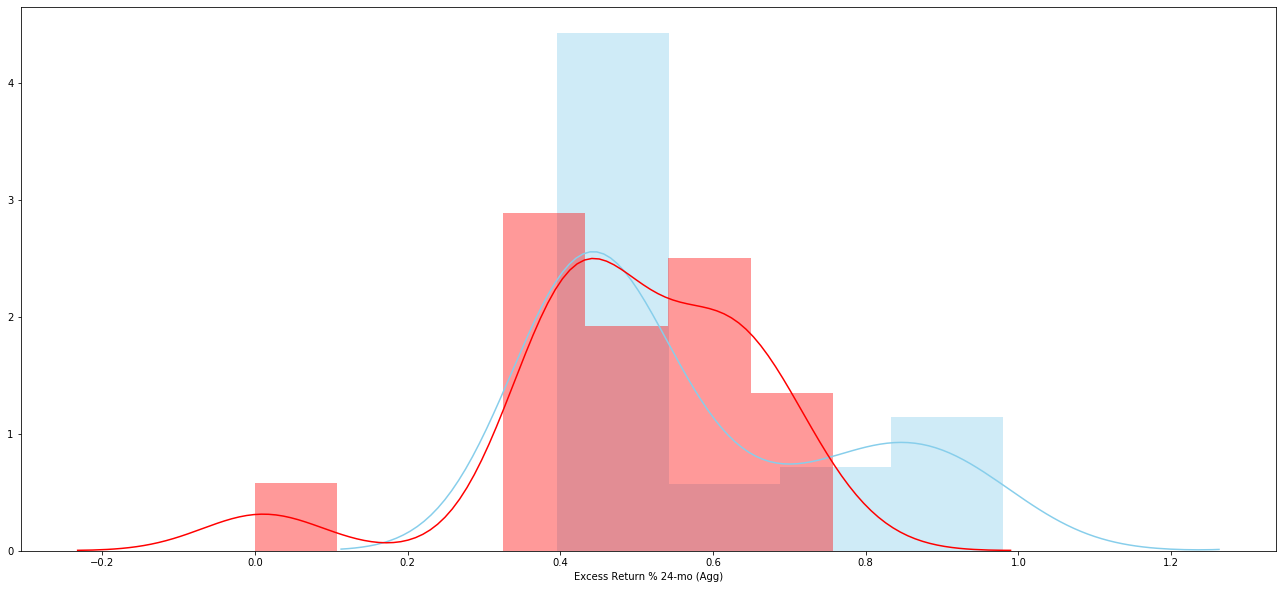

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 36-mo (Treasury)  48.0  0.609353  0.179490  0.025907   
 2                          combined  96.0  0.589998  0.186494  0.019034   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.557234  0.661472  
 2   0.552211  0.627785  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...  -0.0387
 1                              Degrees of freedom =   94.0000
 2                                               t =   -1.0170
 3                           Two side test p value =    0.3117
 4                          Difference < 0 p value =    0.1559
 5                          Difference > 0 p value =    0.8441
 6                                       Cohen's d =   -0.2076
 7                                       Hedge's g =   -0.2059
 8                    

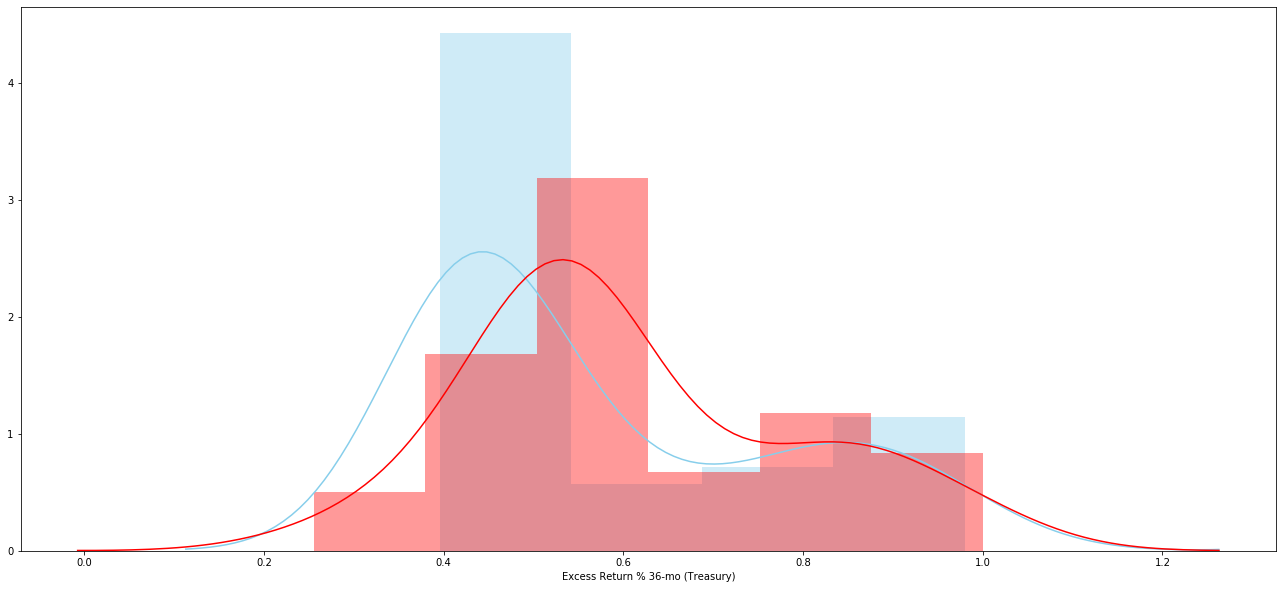

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  48.0  0.570643  0.193180  0.027883   0.514549   
 1  Excess Return % 36-mo (Agg)  48.0  0.515223  0.116676  0.016841   0.481344   
 2                     combined  96.0  0.542933  0.161164  0.016449   0.510278   
 
    Interval  
 0  0.626737  
 1  0.549103  
 2  0.575588  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.0554
 1                              Degrees of freedom =   94.0000
 2                                               t =    1.7013
 3                           Two side test p value =    0.0922
 4                          Difference < 0 p value =    0.9539
 5                          Difference > 0 p value =    0.0461
 6                                       Cohen's d =    0.3473
 7                                       Hedge's g =    0.3445
 8                                   Glass

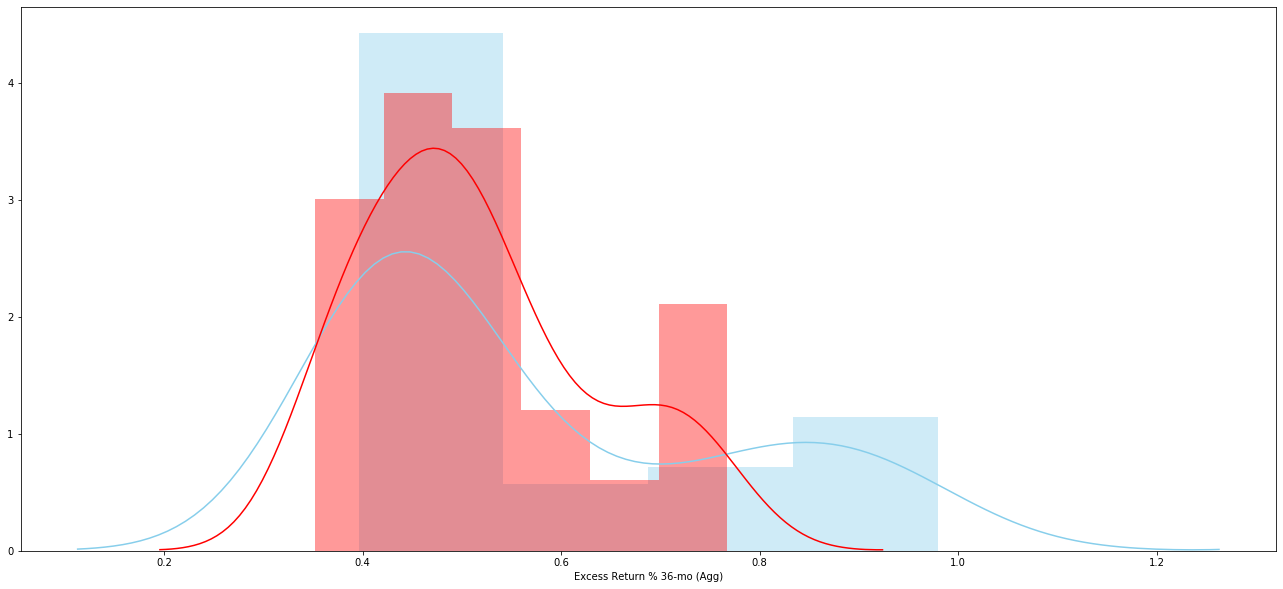

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_CMBS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,267.000000,267.000000,267.000000,266.000000,266.000000,263.000000,263.000000,260.000000,260.000000,257.000000,257.000000,245.000000,245.000000,233.000000,233.000000,267.000000
mean,0.389551,0.497822,0.503905,0.508826,0.507331,0.502922,0.510516,0.503568,0.489132,0.511401,0.510328,0.513404,0.476935,0.502615,0.482371,2.528090
std,0.327368,0.255197,0.234098,0.260708,0.243181,0.274559,0.258519,0.283993,0.249247,0.276018,0.263561,0.296969,0.226476,0.312065,0.234052,1.062943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.129442,0.374333,0.376337,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.299492,0.494333,0.495460,0.510422,0.462486,0.493021,0.474618,0.501222,0.465767,0.519729,0.475128,0.491521,0.445444,0.483095,0.450922,3.000000
75%,0.472081,0.622111,0.625106,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 3-mo (Treasury)  266.0  0.508826  0.260708  0.015985   
 2                         combined  314.0  0.518276  0.252281  0.014237   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.477352  0.540300  
 2   0.490263  0.546288  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.0618
 1                              Degrees of freedom =   312.0000
 2                                               t =     1.5661
 3                           Two side test p value =     0.1183
 4                          Difference < 0 p value =     0.9408
 5                          Difference > 0 p value =     0.0592
 6                                       Cohen's d =     0.2456
 7                                       Hedge's g =     0.2450
 8           

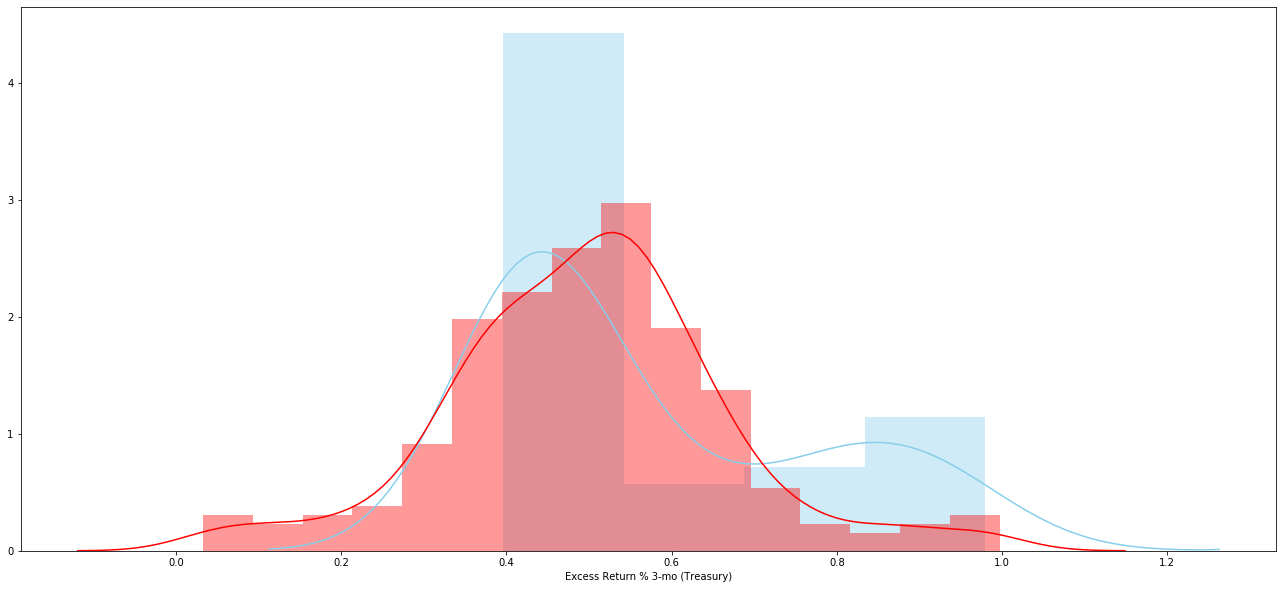

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   48.0  0.570643  0.193180  0.027883   0.514549   
 1  Excess Return % 3-mo (Agg)  266.0  0.507331  0.243181  0.014910   0.477974   
 2                    combined  314.0  0.517010  0.237049  0.013377   0.490688   
 
    Interval  
 0  0.626737  
 1  0.536689  
 2  0.543331  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.0633
 1                             Degrees of freedom =   312.0000
 2                                              t =     1.7083
 3                          Two side test p value =     0.0886
 4                         Difference < 0 p value =     0.9557
 5                         Difference > 0 p value =     0.0443
 6                                      Cohen's d =     0.2679
 7                                      Hedge's g =     0.2673
 8                                  Glass'

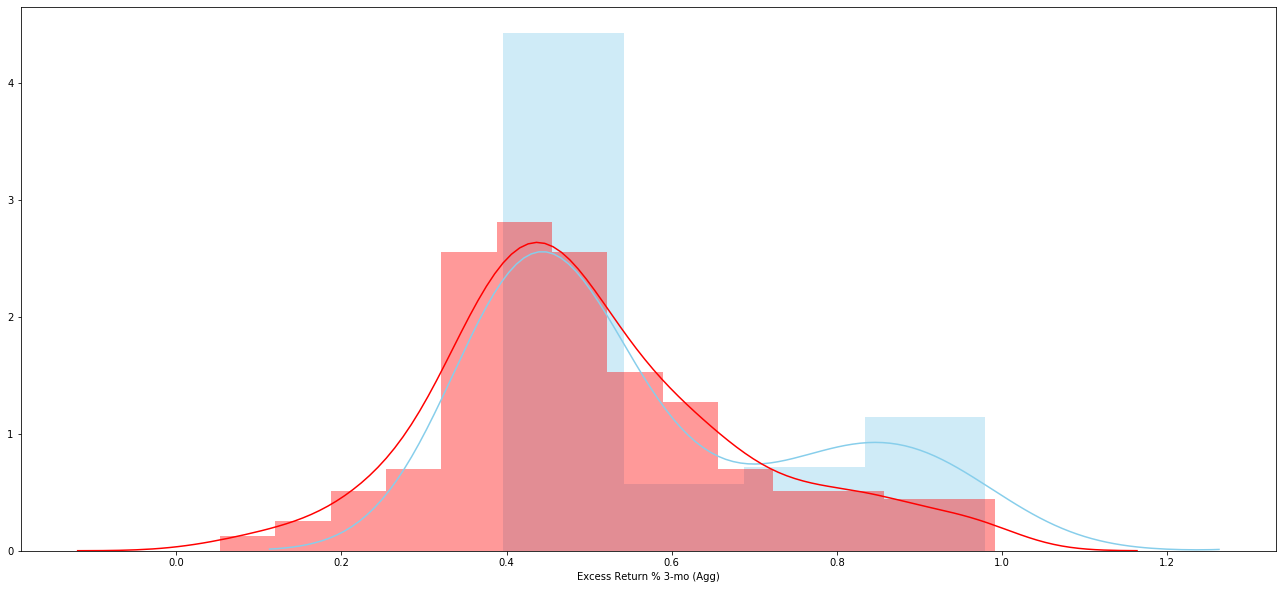

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 6-mo (Treasury)  263.0  0.502922  0.274559  0.016930   
 2                         combined  311.0  0.513374  0.264517  0.014999   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.469586  0.536258  
 2   0.483861  0.542887  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.0677
 1                              Degrees of freedom =   309.0000
 2                                               t =     1.6355
 3                           Two side test p value =     0.1030
 4                          Difference < 0 p value =     0.9485
 5                          Difference > 0 p value =     0.0515
 6                                       Cohen's d =     0.2567
 7                                       Hedge's g =     0.2561
 8           

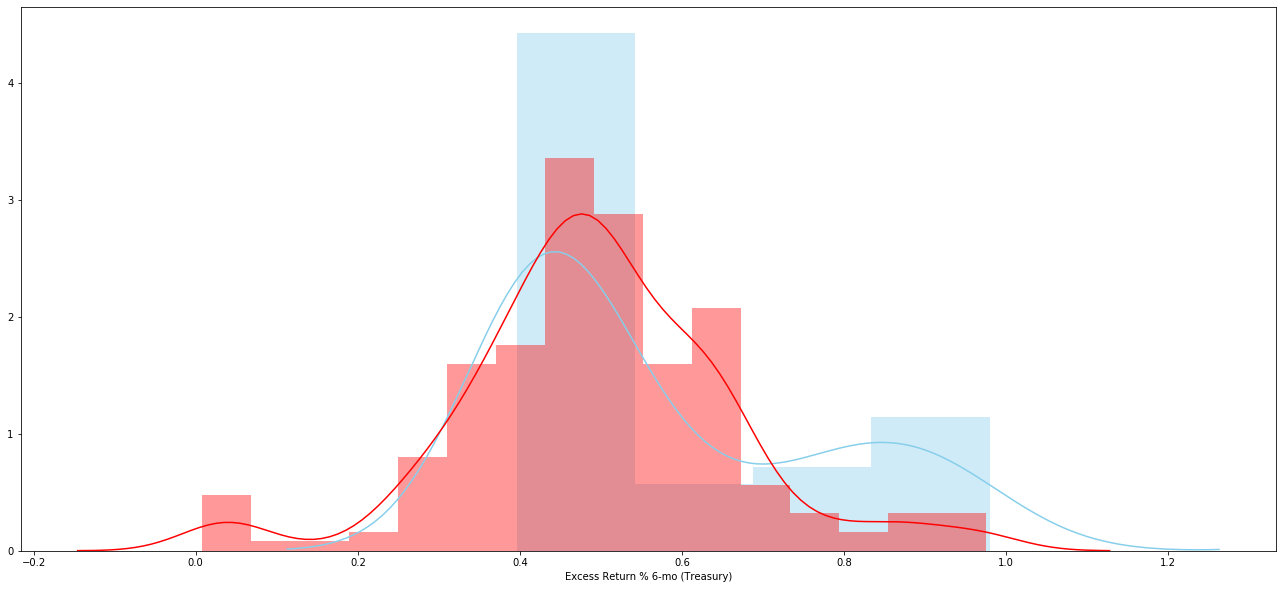

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   48.0  0.570643  0.193180  0.027883   0.514549   
 1  Excess Return % 6-mo (Agg)  263.0  0.510516  0.258519  0.015941   0.479127   
 2                    combined  311.0  0.519796  0.250231  0.014189   0.491876   
 
    Interval  
 0  0.626737  
 1  0.541904  
 2  0.547715  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.0601
 1                             Degrees of freedom =   309.0000
 2                                              t =     1.5342
 3                          Two side test p value =     0.1260
 4                         Difference < 0 p value =     0.9370
 5                         Difference > 0 p value =     0.0630
 6                                      Cohen's d =     0.2408
 7                                      Hedge's g =     0.2402
 8                                  Glass'

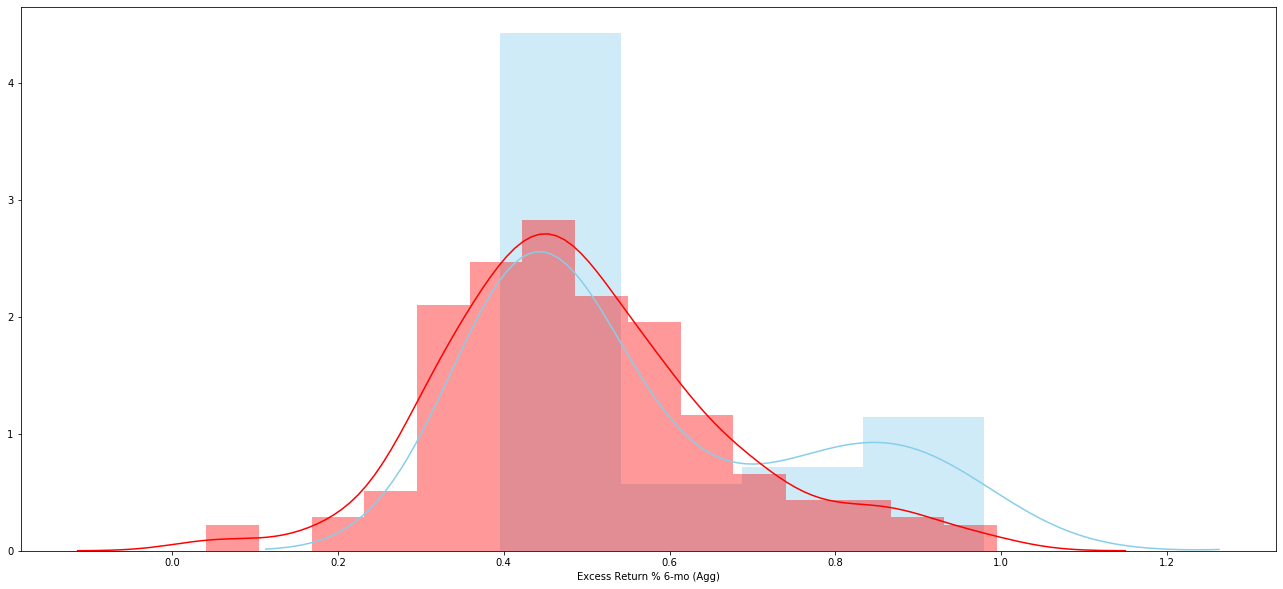

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 9-mo (Treasury)  260.0  0.503568  0.283993  0.017613   
 2                         combined  308.0  0.514021  0.272670  0.015537   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.468886  0.538250  
 2   0.483449  0.544594  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.0671
 1                              Degrees of freedom =   306.0000
 2                                               t =     1.5696
 3                           Two side test p value =     0.1175
 4                          Difference < 0 p value =     0.9412
 5                          Difference > 0 p value =     0.0588
 6                                       Cohen's d =     0.2466
 7                                       Hedge's g =     0.2460
 8           

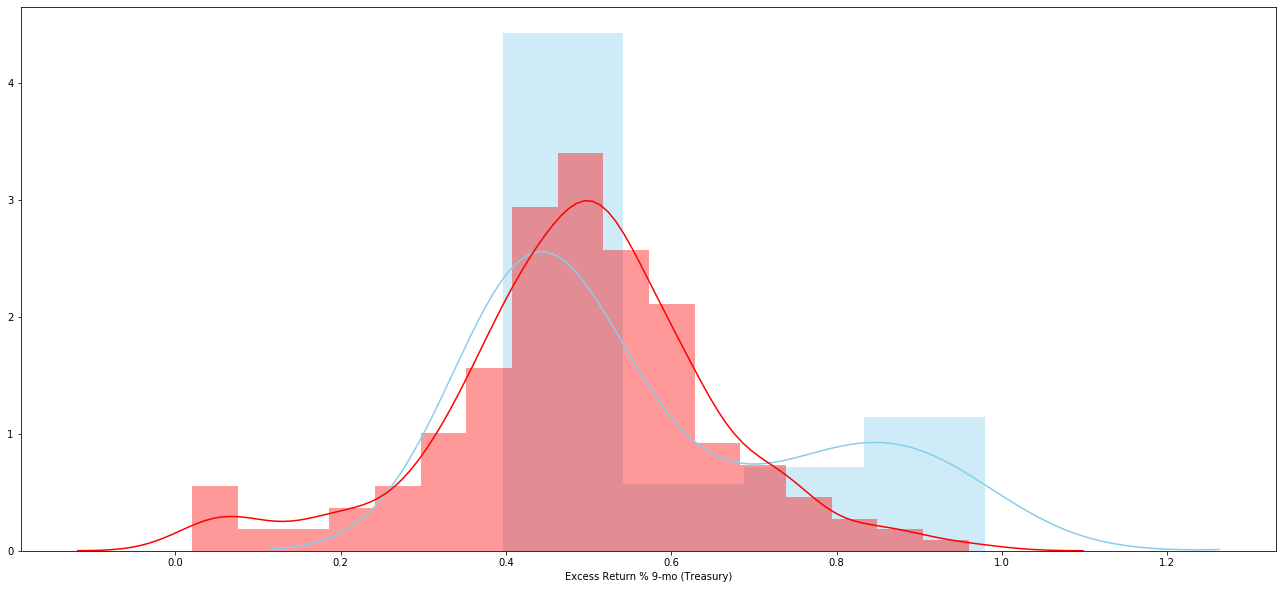

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   48.0  0.570643  0.193180  0.027883   0.514549   
 1  Excess Return % 9-mo (Agg)  260.0  0.489132  0.249247  0.015458   0.458693   
 2                    combined  308.0  0.501835  0.242901  0.013841   0.474600   
 
    Interval  
 0  0.626737  
 1  0.519570  
 2  0.529069  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.0815
 1                             Degrees of freedom =   306.0000
 2                                              t =     2.1486
 3                          Two side test p value =     0.0324
 4                         Difference < 0 p value =     0.9838
 5                         Difference > 0 p value =     0.0162
 6                                      Cohen's d =     0.3375
 7                                      Hedge's g =     0.3367
 8                                  Glass'

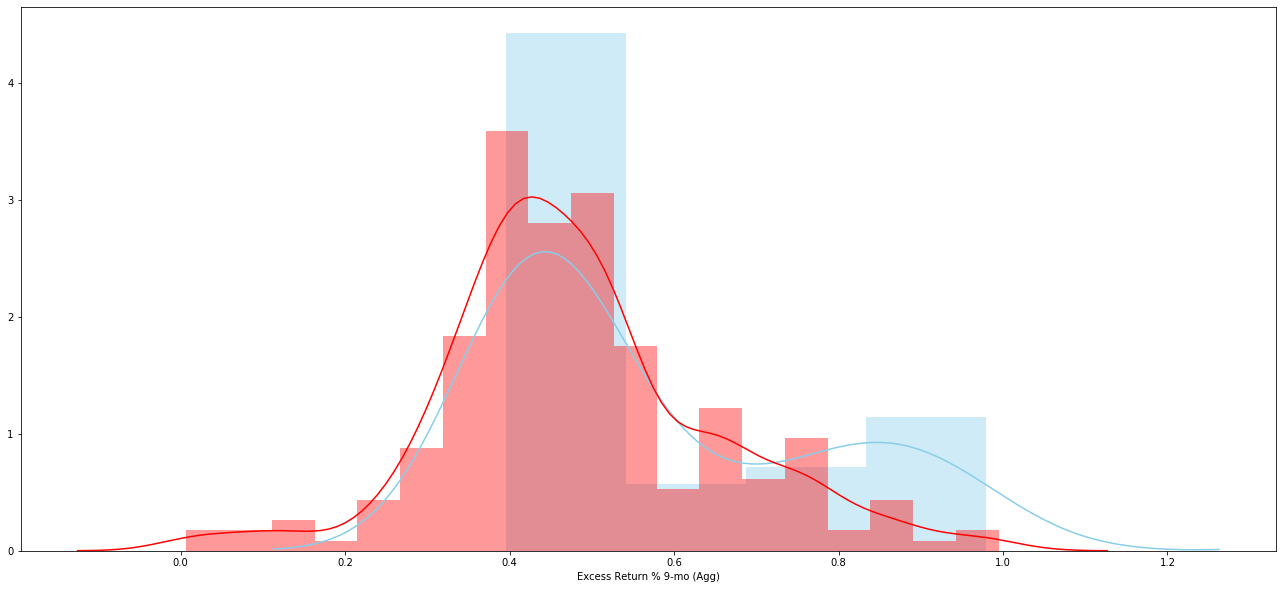

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 12-mo (Treasury)  257.0  0.511401  0.276018  0.017217   
 2                          combined  305.0  0.520724  0.265317  0.015192   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.477495  0.545307  
 2   0.490829  0.550619  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.0592
 1                              Degrees of freedom =   303.0000
 2                                               t =     1.4224
 3                           Two side test p value =     0.1559
 4                          Difference < 0 p value =     0.9220
 5                          Difference > 0 p value =     0.0780
 6                                       Cohen's d =     0.2237
 7                                       Hedge's g =     0.2231
 8       

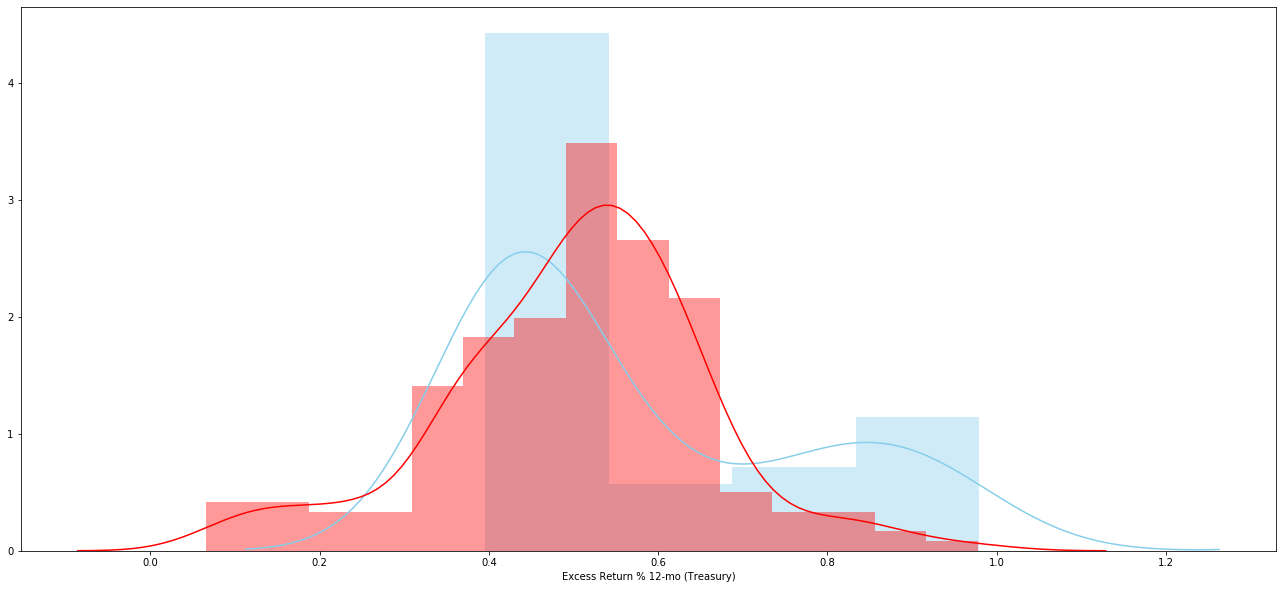

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 12-mo (Agg)  257.0  0.510328  0.263561  0.016440   
 2                     combined  305.0  0.519820  0.254460  0.014570   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.477952  0.542704  
 2   0.491149  0.548492  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.0603
 1                              Degrees of freedom =   303.0000
 2                                               t =     1.5106
 3                           Two side test p value =     0.1319
 4                          Difference < 0 p value =     0.9340
 5                          Difference > 0 p value =     0.0660
 6                                       Cohen's d =     0.2375
 7                                       Hedge's g =     0.2369
 8                           

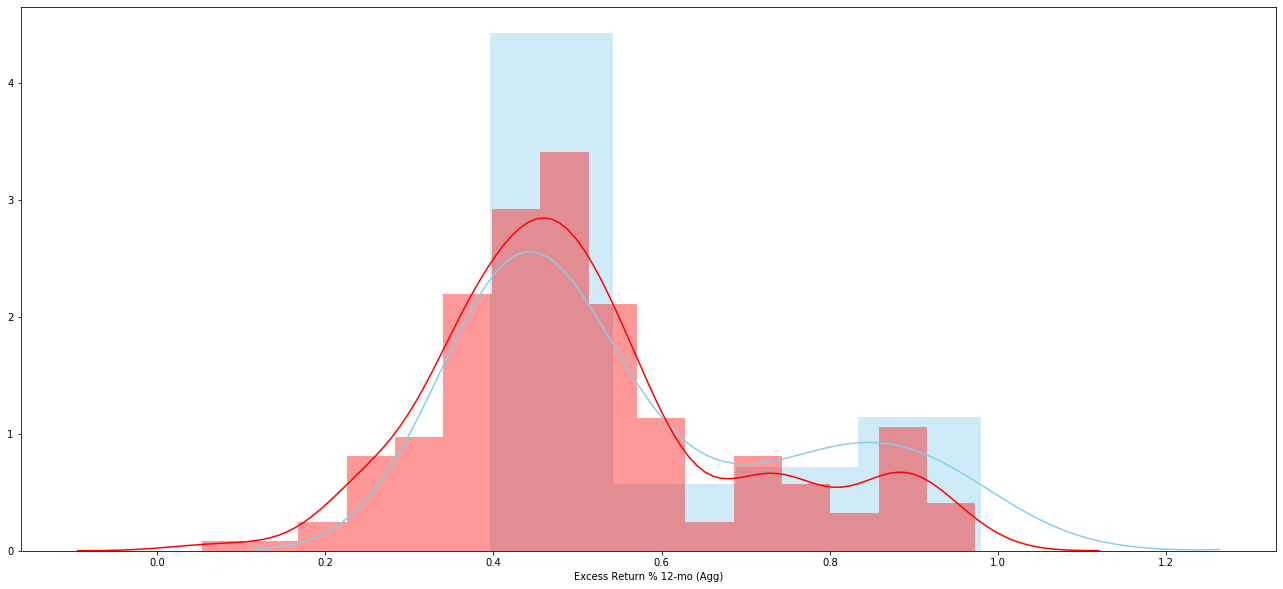

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 24-mo (Treasury)  245.0  0.513404  0.296969  0.018973   
 2                          combined  293.0  0.522781  0.283109  0.016539   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.476033  0.550775  
 2   0.490229  0.555333  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.0572
 1                              Degrees of freedom =   291.0000
 2                                               t =     1.2823
 3                           Two side test p value =     0.2008
 4                          Difference < 0 p value =     0.8996
 5                          Difference > 0 p value =     0.1004
 6                                       Cohen's d =     0.2024
 7                                       Hedge's g =     0.2019
 8       

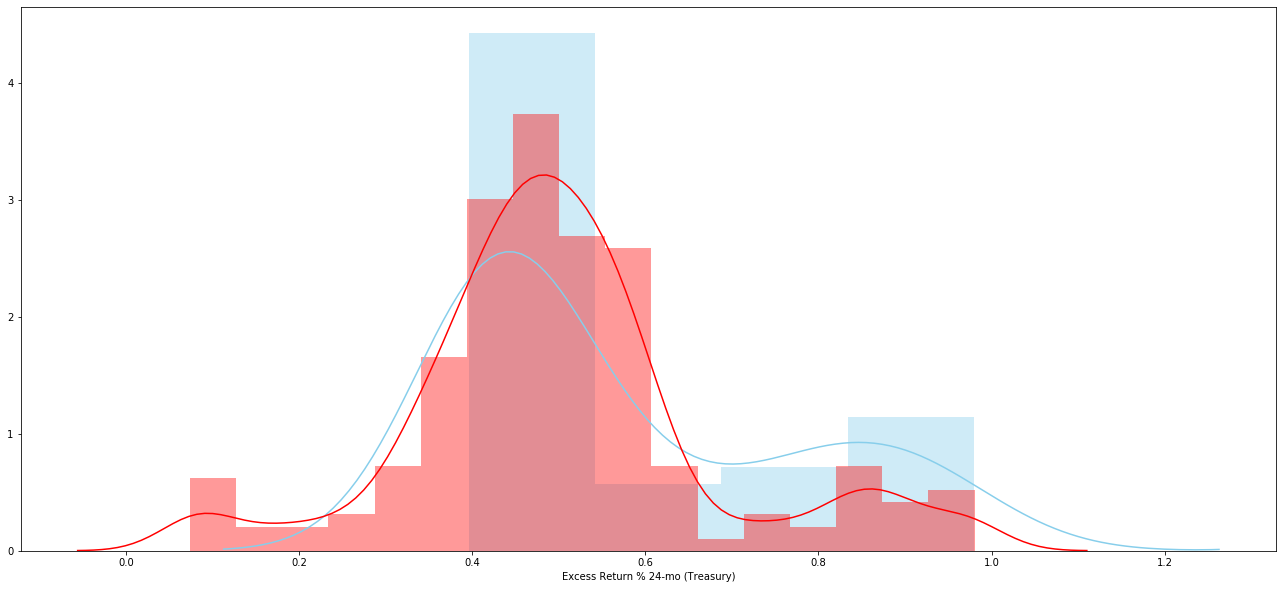

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 24-mo (Agg)  245.0  0.476935  0.226476  0.014469   
 2                     combined  293.0  0.492286  0.223772  0.013073   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.448434  0.505435  
 2   0.466557  0.518015  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.0937
 1                              Degrees of freedom =   291.0000
 2                                               t =     2.6810
 3                           Two side test p value =     0.0078
 4                          Difference < 0 p value =     0.9961
 5                          Difference > 0 p value =     0.0039
 6                                       Cohen's d =     0.4232
 7                                       Hedge's g =     0.4221
 8                           

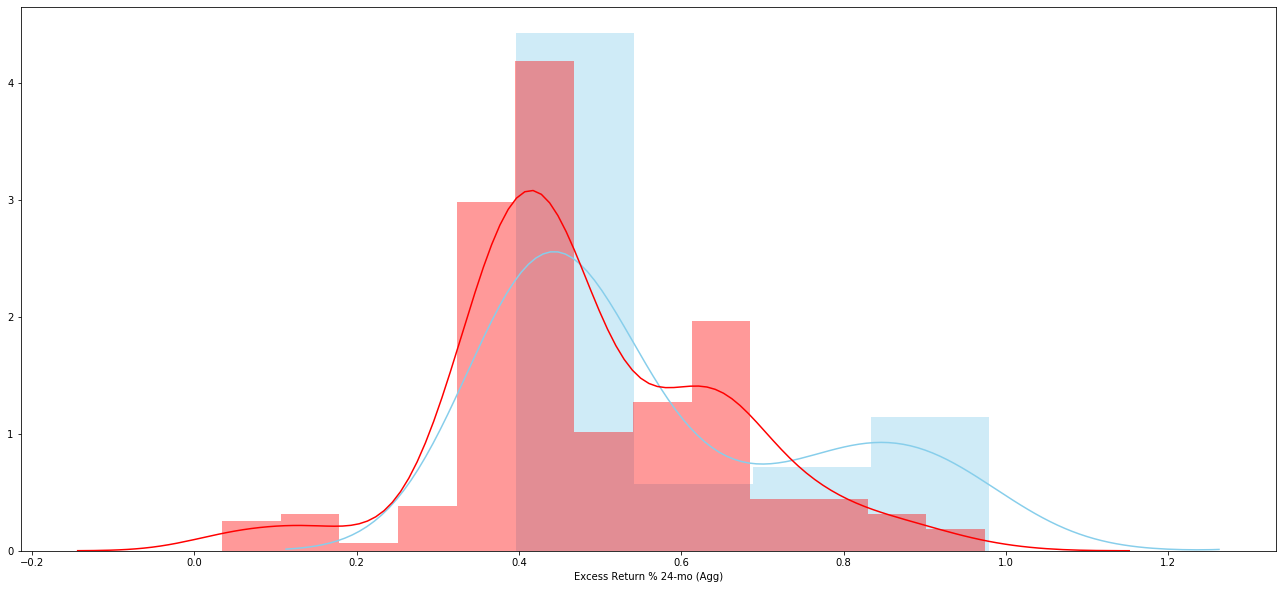

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 36-mo (Treasury)  233.0  0.502615  0.312065  0.020444   
 2                          combined  281.0  0.514235  0.295994  0.017658   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.462335  0.542895  
 2   0.479477  0.548994  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.0680
 1                              Degrees of freedom =   279.0000
 2                                               t =     1.4528
 3                           Two side test p value =     0.1474
 4                          Difference < 0 p value =     0.9263
 5                          Difference > 0 p value =     0.0737
 6                                       Cohen's d =     0.2303
 7                                       Hedge's g =     0.2297
 8       

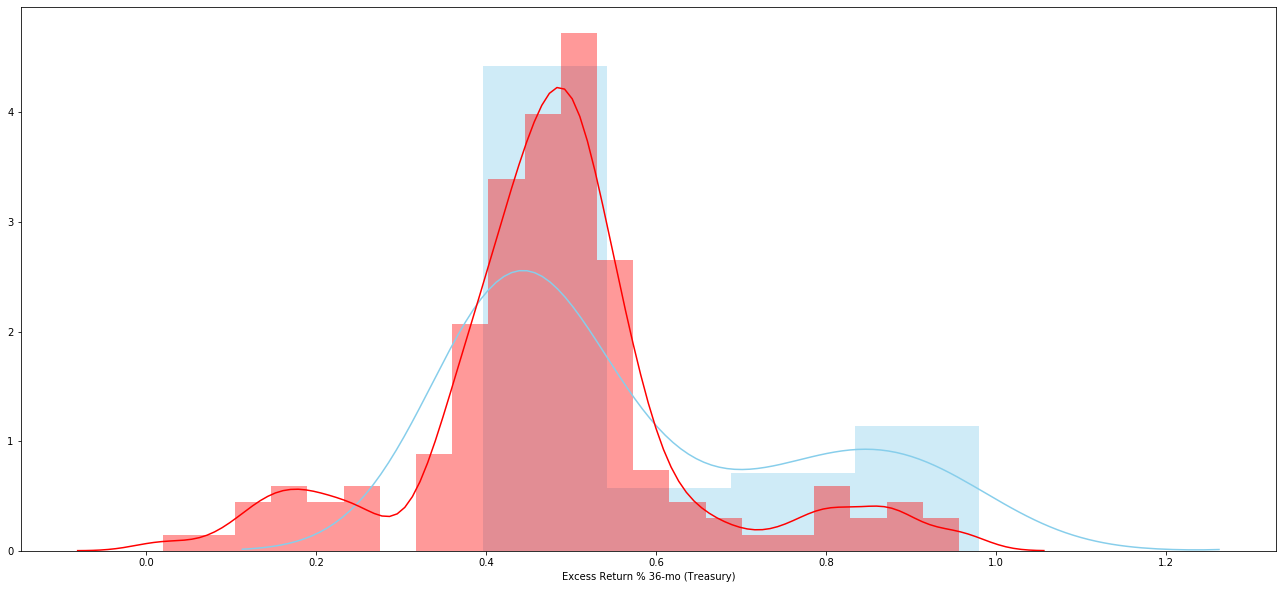

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   48.0  0.570643  0.193180  0.027883   
 1  Excess Return % 36-mo (Agg)  233.0  0.482371  0.234052  0.015333   
 2                     combined  281.0  0.497449  0.229698  0.013703   
 
    95% Conf.  Interval  
 0   0.514549  0.626737  
 1   0.452161  0.512581  
 2   0.470476  0.524423  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.0883
 1                              Degrees of freedom =   279.0000
 2                                               t =     2.4459
 3                           Two side test p value =     0.0151
 4                          Difference < 0 p value =     0.9925
 5                          Difference > 0 p value =     0.0075
 6                                       Cohen's d =     0.3877
 7                                       Hedge's g =     0.3867
 8                           

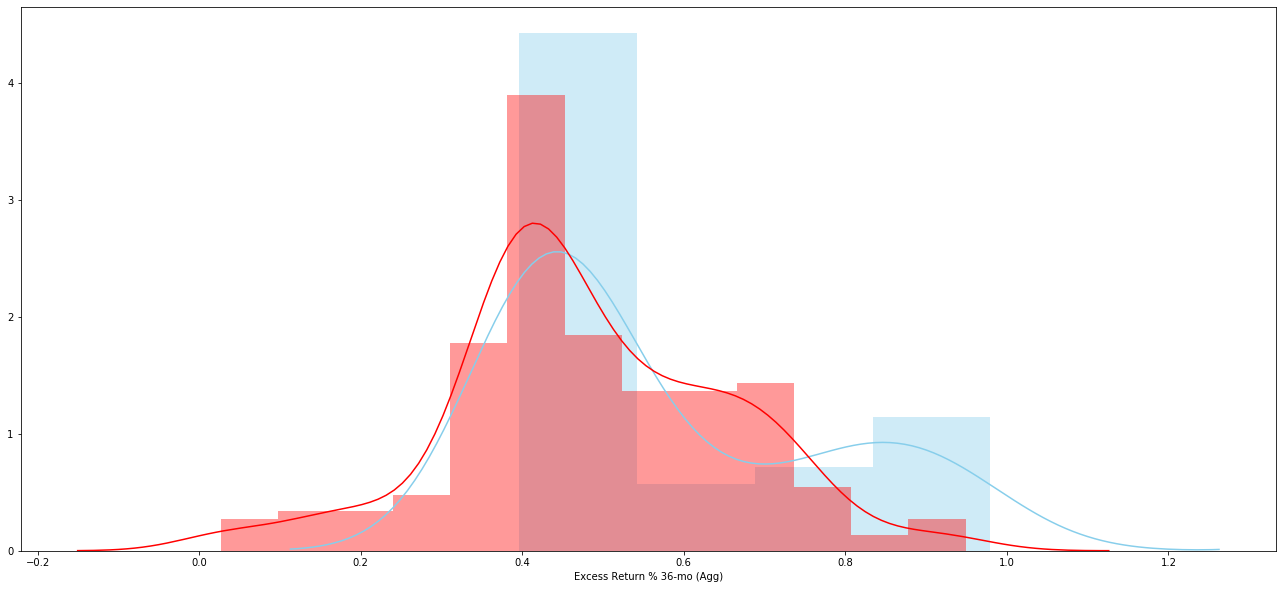

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")